# Decision Trees Recap


Now is the perfect time to recap everything you have learned about decision trees. 

By the way, this can also be done as a pair exercise! Explaining the concepts to another person allows you to challenge and deepen your own understanding. 
Here are two ways to do this:
- a. we have created a sketch board where you can answer the questions together (you can both write on the same board).
- b. you answer the questions together in this notebook.

For a: In this repo, we have added an excalidraw file ("Decision-Tree-Recap.excalidraw"). You can open this at [excalidraw.com](https://excalidraw.com/) and start a "live collaboration" session with your Pair Programmer. Start with explaining the Decision Tree Algorithm to each other in 2 minutes.


For b: Here are the questions:

1. The typical interview question:
<br />
<br />
Q: What is your favorite algorithm?
<br />
A: Decision trees
<br />
Q: Can you explain it to me in 2 minutes?
<br />
<br />
2. Explain the tree terminology: node, threshold, leaf, and stump.
<br />
<br />
3. Explain how to determine the optimal split 
<br />
<br />
4. Explain what the Gini impurity is and how to calculate it
<br />
<br />
5. Explain how to make predictions for unseen data (especially with an impure leaf)
<br />
<br />
6. How to avoid overfitting decision trees
<br />
<br />
7. What are the advantages and disadvantages of decision trees?
<br />
<br />


8. Here is a sample data set. Please check your understanding and let's grow a tree on paper! 

    Data:
    
    |X1|X2 |Y|
    |---|---|---|
    |15|35|1|
    |17|45|1|
    |24|37|1|
    |24|37|1|
    |23|45|2|
    |27|37|2|
    |33|37|2|
    |27|34|3|
    |28|33|3|


    Remember how to decide on the next division to be made.
    - Please calculate the Gini gain for each step. 
    - You can also draw a scatterplot with all data points on paper and add the decision boundaries. 
    - Do you think there would have been another way to split the tree to get the same Gini gain at each step?
    - To evaluate your grown tree, simply use the data and train a decision tree with Sklearn and plot your tree as you have seen in the notebook before.

If you want to read up on how to make the next decision in your tree and how to calculate the Gini gain, here is a good resource: [Decision Tree from Scratch in Python](https://towardsdatascience.com/decision-tree-from-scratch-in-python-46e99dfea775). **Only the text!**

---
## Extras

If you haven't had enough of decision trees yet, here are a few more ways to delve further into the topic:
1. get deep into the code of building a dec tree from scratch in python
2. get into the [theory of building trees recursively](https://cr.yp.to/2005-261/bender2/DT.pdf) (same as nr. 1 but without code)
3. watch [another decision tree lecture](https://www.youtube.com/watch?v=wr9gUr-eWdA&list=PLEny7y9mZcaxFAyivwT2nwIEvfHAzFdX9&index=11), they are talking splitting criterions (entropy, gini etc) and regression trees. The part about decision trees ends after 1h.

### To Nr 1
You will see that in the [blogpost above](https://towardsdatascience.com/decision-tree-from-scratch-in-python-46e99dfea775) there is also an own Python implementation of the Decison Tree Algorithm at the end.
This is an **extra**: If you want to dive deep into how to building a decision tree **recursively** in Python, check out the following code. 

This code is built like a python script: it starts with the definitions of the classes and their methods. At the very bottom the implemented Decision Tree Classifier is then applied to the iris dataset.




In [ ]:
"""Implementation of the CART algorithm to train decision tree classifiers."""
import numpy as np


class Node:
    def __init__(self, predicted_class):
        self.predicted_class = predicted_class
        self.feature_index = 0
        self.threshold = 0
        self.left = None
        self.right = None


class DecisionTreeClassifier:
    def __init__(self, max_depth=None):
        self.max_depth = max_depth

    def fit(self, X, y):
        """Build decision tree classifier."""
        self.n_classes_ = len(set(y))
        self.n_features_ = X.shape[1]
        self.tree_ = self._grow_tree(X, y)

    def predict(self, X):
        return [self._predict(inputs) for inputs in X]

    def _best_split(self, X, y):
        """Find the best split for a node.
        "Best" means that the average impurity of the two children, weighted by their
        population, is the smallest possible. Additionally it must be less than the
        impurity of the current node.
        To find the best split, we loop through all the features, and consider all the
        midpoints between adjacent training samples as possible thresholds. We compute
        the Gini impurity of the split generated by that particular feature/threshold
        pair, and return the pair with smallest impurity.
        Returns:
            best_idx: Index of the feature for best split, or None if no split is found.
            best_thr: Threshold to use for the split, or None if no split is found.
        """
        # Need at least two elements to split a node.
        m = y.size
        if m <= 1:
            return None, None

        # Count of each class in the current node.
        num_parent = [np.sum(y == c) for c in range(self.n_classes_)]

        # Gini of current node.
        best_gini = 1.0 - sum((n / m) ** 2 for n in num_parent)
        best_idx, best_thr = None, None

        # Loop through all features.
        for idx in range(self.n_features_):
            # Sort data along selected feature.
            thresholds, classes = zip(*sorted(zip(X[:, idx], y)))

            # We could actually split the node according to each feature/threshold pair
            # and count the resulting population for each class in the children, but
            # instead we compute them in an iterative fashion, making this for loop
            # linear rather than quadratic.
            num_left = [0] * self.n_classes_
            num_right = num_parent.copy()
            for i in range(1, m):
                c = classes[i - 1]
                num_left[c] += 1
                num_right[c] -= 1
                gini_left = 1.0 - sum(
                    (num_left[x] / i) ** 2 for x in range(self.n_classes_)
                )
                gini_right = 1.0 - sum(
                    (num_right[x] / (m - i)) ** 2 for x in range(self.n_classes_)
                )

                # The Gini impurity of a split is the weighted average of the Gini
                # impurity of the children.
                gini = (i * gini_left + (m - i) * gini_right) / m

                # The following condition is to make sure we don't try to split two
                # points with identical values for that feature, as it is impossible
                # (both have to end up on the same side of a split).
                if thresholds[i] == thresholds[i - 1]:
                    continue

                if gini < best_gini:
                    best_gini = gini
                    best_idx = idx
                    best_thr = (thresholds[i] + thresholds[i - 1]) / 2

        return best_idx, best_thr

    def _grow_tree(self, X, y, depth=0):
        """Build a decision tree by recursively finding the best split."""
        # Population for each class in current node. The predicted class is the one with
        # largest population.
        num_samples_per_class = [np.sum(y == i) for i in range(self.n_classes_)]
        predicted_class = np.argmax(num_samples_per_class)
        node = Node(predicted_class=predicted_class)

        # Split recursively until maximum depth is reached.
        if depth < self.max_depth:
            idx, thr = self._best_split(X, y)
            if idx is not None:
                indices_left = X[:, idx] < thr
                X_left, y_left = X[indices_left], y[indices_left]
                X_right, y_right = X[~indices_left], y[~indices_left]
                node.feature_index = idx
                node.threshold = thr
                node.left = self._grow_tree(X_left, y_left, depth + 1)
                node.right = self._grow_tree(X_right, y_right, depth + 1)
        return node

    def _predict(self, inputs):
        """Predict class for a single sample."""
        node = self.tree_
        while node.left:
            if inputs[node.feature_index] < node.threshold:
                node = node.left
            else:
                node = node.right
        return node.predicted_class


if __name__ == "__main__":
    import sys
    from sklearn.datasets import load_iris

    # Load data.
    dataset = load_iris()
    X, y = dataset.data, dataset.target  # pylint: disable=no-member

    #train model
    clf = DecisionTreeClassifier(max_depth=1)
    clf.fit(X, y)

    #predict on one sample
    print(clf.predict([[0, 0, 5, 1.5]]))

### What's done when running clf.fit()

If you're feeling a little lost in the code and recursive tree construction, hopefully this image can help you a bit with how the tree was built. Of course, it is only an example, including some possibilities why further splits didn't happen.

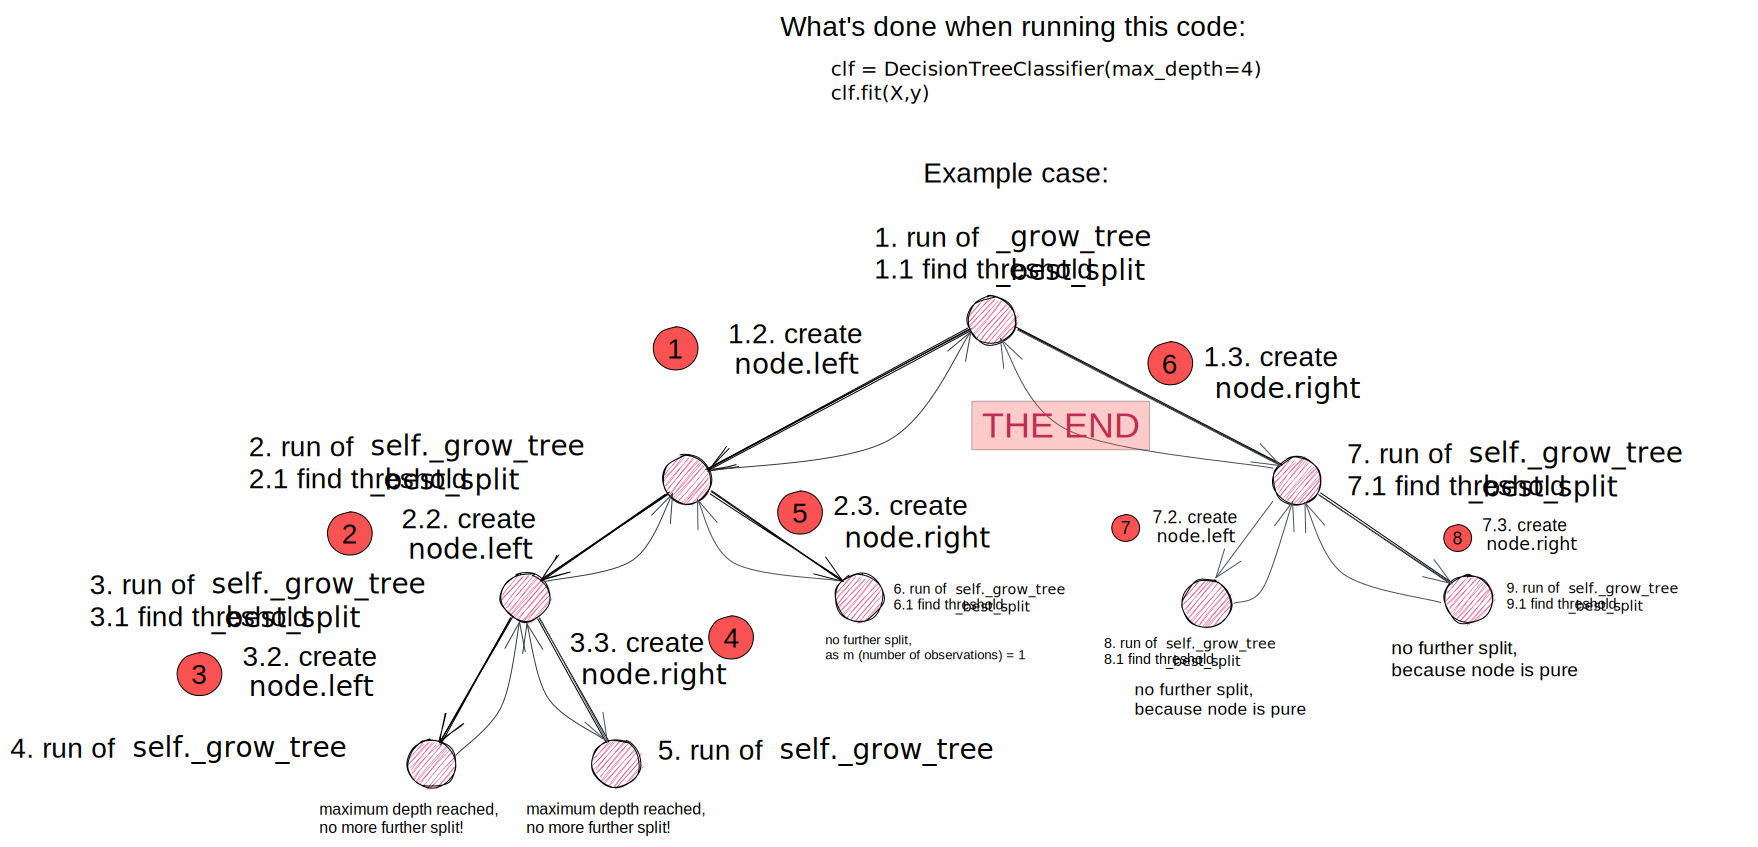

In [1]:
from IPython.core.display import SVG
SVG(filename='Decision_Tree.svg')